lightgbm 학습 전에 비슷한 에시를 가져와서 먼저 학습을 시도

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
# cust_df = pd.read_csv('train_santander.csv', encoding='latin-1')
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_importance

In [ ]:
# 경고메시지를 무시하는 코드
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
#데이터셋 가져오기
dataset = load_breast_cancer()
# dataset.info()
features = dataset.data
features

labels = dataset.target

In [ ]:
cancer_data = pd.DataFrame(data=features, columns=dataset.feature_names)

In [ ]:
cancer_data['target'] = labels
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
cancer_data['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [ ]:
# loc, iloc의 차이점 : 인덱싱하는 함수
# loc은 문자열/인덱스 번호로 인덱싱한다면, iloc은 정수 인덱스로 인덱싱하는 차이점이 있다.
X_features = cancer_data.iloc[:, :-1]

In [ ]:
cancer_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
X_features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y_label = cancer_data.iloc[:,-1]

In [ ]:
y_label

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                    test_size=0.2,
                                                    random_state=150)

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1,
                                            random_state=150)

In [ ]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [ ]:
X_tr.shape, X_val.shape

((409, 30), (46, 30))

In [ ]:
# Dmatrix -> train, test 데이터세트를 별도로 구분하기 위해서 DMatrix를 사용
# numpy 입력 파라미터를 받아서 만들어지는 XGBoost의 전용 데이터세트를 의미
# 입력 파라미터의 경우, data, label를 의미한다.
dtr = xgb.DMatrix(data=X_tr, label=y_tr)

In [ ]:
dval = xgb.DMatrix(data=X_val, label=y_val)

In [ ]:
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
import xgboost
xgboost.__version__

'2.0.3'

In [ ]:
#lightgbmClassifier 예제코드
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
diab = pd.read_csv('diabetes.csv')

In [ ]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diab['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
X = diab.drop('Outcome', axis=1, inplace=False)

In [ ]:
y = diab['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=150)

In [ ]:
lgbmwrapper = LGBMClassifier(n_estimators=400)

In [ ]:
evals = [(X_test, y_test)]

In [ ]:
lgbmwrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss',
                eval_set=evals, verbose=True)

TypeError: LGBMClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
#본격적으로 들어가기 전
from sklearn.ensemble import GradientBoostingRegressor
# lightgbm 본 게임 전 가벼운 코딩
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#iris 데이터로 예제실습 도전
from lightgbm import LGBMClassifier

In [ ]:
# lightgbm 현 버전 확인하는 코드
import lightgbm;
print(lightgbm.__version__)

4.1.0


In [ ]:
#iris 데이터 가져오기
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [ ]:
# 사이키럿엔서 train,test로 분리시키는 코드
# 라이브러리 먼저 불러오기
from sklearn.model_selection import train_test_split

In [ ]:
k = dataset.data
target = dataset.target

In [ ]:
k.shape

(569, 30)

In [ ]:
print(k[:3], '\n')

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]] 



In [ ]:
print(target[:3])

[0 0 0]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(k, target, test_size=0.2, random_state=50)

In [ ]:
Lgbm = LGBMClassifier(n_estimators=300)

In [ ]:
evals = [(X_test, y_test)]

In [ ]:
!pip install tabgan==1.3.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.6 MB/s eta 0:00:00


In [ ]:
# Lgbm.fit(X_train, y_train, early_stopping_rounds= 100, eval_metric='logloss',
#          eval_set=evals, verbose=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# 새로운 데이터로 다시 시도

# heart = pd.read_csv('heart.csv')

In [ ]:
#credit 데이터로 시도
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
credit_data = pd.read_csv('credit.csv')

In [ ]:
# credit 데이터의 칼럼 정보 및 데이터 타입 확인
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        12500 non-null  object 
 1   Customer_ID               12500 non-null  object 
 2   Name                      11273 non-null  object 
 3   Age                       12500 non-null  object 
 4   SSN                       12500 non-null  object 
 5   Occupation                12500 non-null  object 
 6   Annual_Income             12500 non-null  object 
 7   Num_Bank_Accounts         12500 non-null  int64  
 8   Num_Credit_Card           12500 non-null  int64  
 9   Interest_Rate             12500 non-null  int64  
 10  Num_of_Loan               12500 non-null  object 
 11  Type_of_Loan              11074 non-null  object 
 12  Delay_from_due_date       12500 non-null  int64  
 13  Num_of_Delayed_Payment    11657 non-null  object 
 14  Num_Cr

In [ ]:
pd.set_option('display.max_columns',30)
credit_data

,ID,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,4.0,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.494089,Good
1,0x160e,CUS_0x21b1,Rick Rothackerj,28_,004-07-5839,_______,34847.84,2,4,6,1,Credit-Builder Loan,3,4,2.0,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.690627,Standard
2,0x161a,CUS_0x2dbc,Langep,34,486-85-3974,_______,143162.64,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8,3.0,1303.01,28.616735,17 Years and 9 Months,No,246.992320,168.4137027,!@9#%8,1043.315978,Good
3,0x1626,CUS_0xb891,Jasond,54,072-31-6145,Entrepreneur,30689.89,2,5,4,1,Not Specified,0,6,4.0,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.22885871,Low_spent_Large_value_payments,433.604773,Standard
4,0x1632,CUS_0x1cdb,Deepaa,21,615-06-7821,Developer,35547.71_,7,5,5,0,NaN,5,NaN,4.0,943.86,39.797764,30 Years and 8 Months,Yes,0.000000,276.7253943,!@9#%8,288.605522,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,0x25fb6,CUS_0x372c,Lucia Mutikanik,18,340-85-7301,Lawyer,42903.79,0,4,6,1,Not Specified,14,0,1.0,1079.48,27.289440,28 Years and 1 Months,No,50894.000000,78.51494451,High_spent_Small_value_payments,493.341182,Good
12496,0x25fc2,CUS_0xf16,Maria Sheahanb,44,#F%$D@*&8,Media_Manager,16680.35,1,1,5,4,"Payday Loan, Student Loan, Mortgage Loan, and ...",4,0,4.0,897.16,39.868572,NaN,NM,41.113561,52.95197782,High_spent_Small_value_payments,318.737378,Good
12497,0x25fce,CUS_0xaf61,Chris Wickhamm,49,133-16-7738,Writer,37188.1,1,4,5,3,"Home Equity Loan, Mortgage Loan, and Student Loan",7,12,3.0,620.64,39.080823,29 Years and 9 Months,No,84.205949,223.8750182,Low_spent_Small_value_payments,291.619866,Good
12498,0x25fda,CUS_0x8600,Sarah McBridec,28,031-35-0942,Architect,20002.88,10,8,29,5_,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",35,26,9.0,3571.7_,22.895966,5 Years and 8 Months,Yes,60.964772,43.37067007,High_spent_Large_value_payments,328.655224,Poor


In [ ]:
#모델링에 불필요한 칼럼 제거
credit_data.drop(['ID', 'Customer_ID','Name', 'SSN'], axis=1, inplace=True)

In [ ]:
credit_data['Credit_Score'].value_counts()

Standard    6943
Poor        3582
Good        1975
Name: Credit_Score, dtype: int64

In [ ]:
# Credit_Score 칼럼의 경우 범주형이므로 범주형으로 대체하는 코드로 만들면 된다
# 범주형 대체? -> 라벨 인코딩을 한다고 이해하면 된다
credit_data['Credit_Score'] = credit_data['Credit_Score'].replace({'Poor':0,
                                                                   'Standard':1, 'Good':2})

In [ ]:
credit_data['Credit_Score']

0        2
1        1
2        2
3        1
4        1
        ..
12495    2
12496    2
12497    2
12498    0
12499    0
Name: Credit_Score, Length: 12500, dtype: int64

<Axes: xlabel='Payment_of_Min_Amount', ylabel='Credit_Score'>

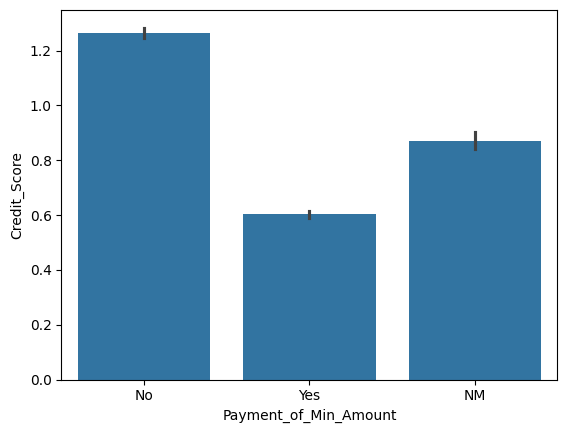

In [ ]:
# 리볼링 여부에 따라서 신용점수 시각화
sns.barplot(x='Payment_of_Min_Amount', y='Credit_Score', data=credit_data)

<Axes: xlabel='Occupation', ylabel='Credit_Score'>

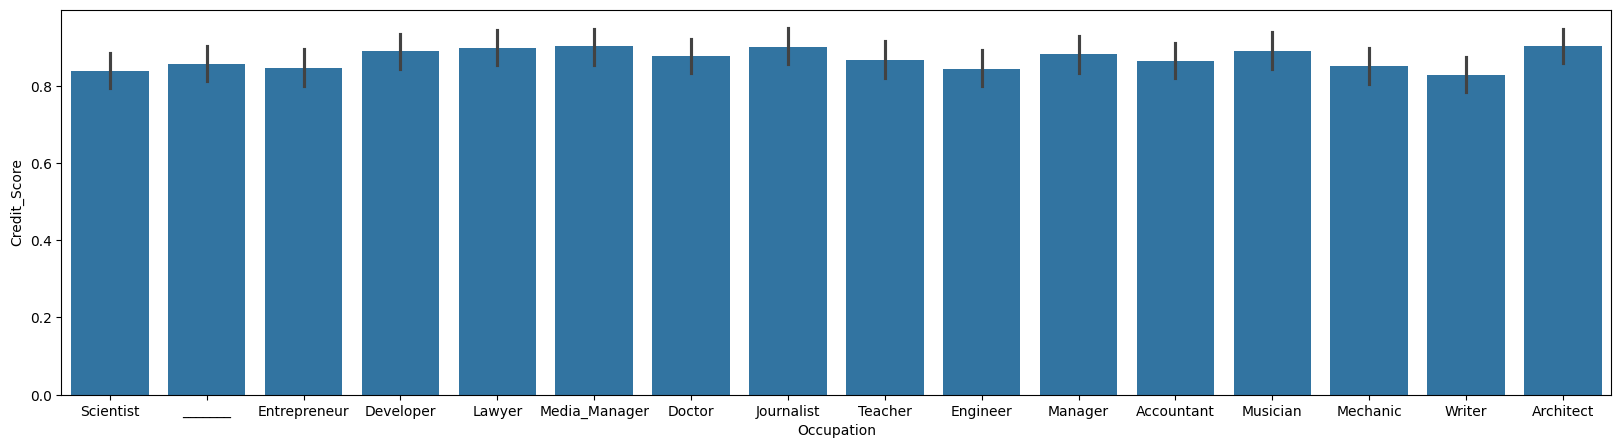

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Occupation', y='Credit_Score', data=credit_data)

In [ ]:
#credit_data에서 데이터 타입이 object인 것들만 추출
for i in credit_data.columns:
    if credit_data[i].dtypes == 'O':
        print(i)

Age
Occupation
Annual_Income
Num_of_Loan
Type_of_Loan
Num_of_Delayed_Payment
Outstanding_Debt
Credit_History_Age
Payment_of_Min_Amount
Amount_invested_monthly
Payment_Behaviour


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(credit_data.drop('Credit_Score', axis=1),
                                                    credit_data['Credit_Score'], test_size=0.2, random_state=10)

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
#모델링 생성
base_model = LGBMClassifier(random_state=30)

In [ ]:
# base_model.fit(X_train,)

In [24]:
# 비슷한 데이터로 했으면 이제 본 데이터로 다시 시도
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

In [25]:
train.info()
# test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13524 entries, 0 to 13523
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        13524 non-null  object 
 1   Customer_ID               13524 non-null  object 
 2   Month                     13523 non-null  object 
 3   Name                      12182 non-null  object 
 4   Age                       13523 non-null  object 
 5   SSN                       13523 non-null  object 
 6   Occupation                13523 non-null  object 
 7   Annual_Income             13523 non-null  object 
 8   Monthly_Inhand_Salary     11477 non-null  float64
 9   Num_Bank_Accounts         13523 non-null  float64
 10  Num_Credit_Card           13523 non-null  float64
 11  Interest_Rate             13523 non-null  float64
 12  Num_of_Loan               13523 non-null  object 
 13  Type_of_Loan              11984 non-null  object 
 14  Delay_

In [26]:
# train에서 불필요한 칼럼 제거
# 모든 칼럼들 y-> Credit_Score를 둔 나머지 26개의 칼럼들을 다 적용할 필요는 없고 일부만 사용
# axis=0 : 행을 기준, axis=1: 열을 기준으로 삼는다는 의미
train.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Credit_Mix', 'Type_of_Loan', 'Monthly_Balance'], axis=1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13524 entries, 0 to 13523
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       13523 non-null  object 
 1   Occupation                13523 non-null  object 
 2   Annual_Income             13523 non-null  object 
 3   Num_Bank_Accounts         13523 non-null  float64
 4   Num_Credit_Card           13523 non-null  float64
 5   Interest_Rate             13523 non-null  float64
 6   Num_of_Loan               13523 non-null  object 
 7   Delay_from_due_date       13523 non-null  float64
 8   Num_of_Delayed_Payment    12565 non-null  object 
 9   Num_Credit_Inquiries      13240 non-null  float64
 10  Outstanding_Debt          13523 non-null  object 
 11  Credit_Utilization_Ratio  13523 non-null  float64
 12  Credit_History_Age        12267 non-null  object 
 13  Payment_of_Min_Amount     13523 non-null  object 
 14  Total_

In [27]:
# train.drop(['ID', 'Customer_ID', 'Name', 'SSN'], axis=1, inplace=True)
# train_data에서 credit_score가 Good, Poor, Standard 3개의 범주로 이루어져 있음을 확인할 수가 있다.
train['Credit_Score'].value_counts()

Standard    7103
Poor        4008
Good        2412
Name: Credit_Score, dtype: int64

In [28]:
# 범주형 대체? -> 라벨 인코딩을 한다고 이해하면 된다
train['Credit_Score'] = train['Credit_Score'].replace({'Poor':0,
                                                       'Standard':1, 'Good':2})

In [29]:
train['Credit_Score']

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
13519    0.0
13520    1.0
13521    1.0
13522    1.0
13523    NaN
Name: Credit_Score, Length: 13524, dtype: float64

<Axes: xlabel='Payment_of_Min_Amount', ylabel='Credit_Score'>

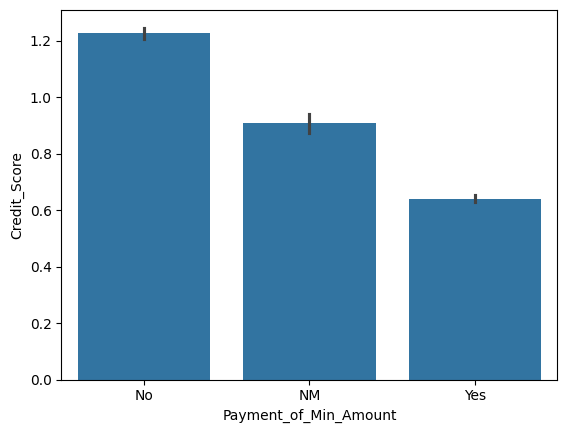

In [30]:
# 리볼빙 여부에 따라 신용등급 관계를 barplot으로 표현하는 코드
sns.barplot(x='Payment_of_Min_Amount', y='Credit_Score', data=train)

<ipython-input-31-0872243759df>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)


<Axes: >

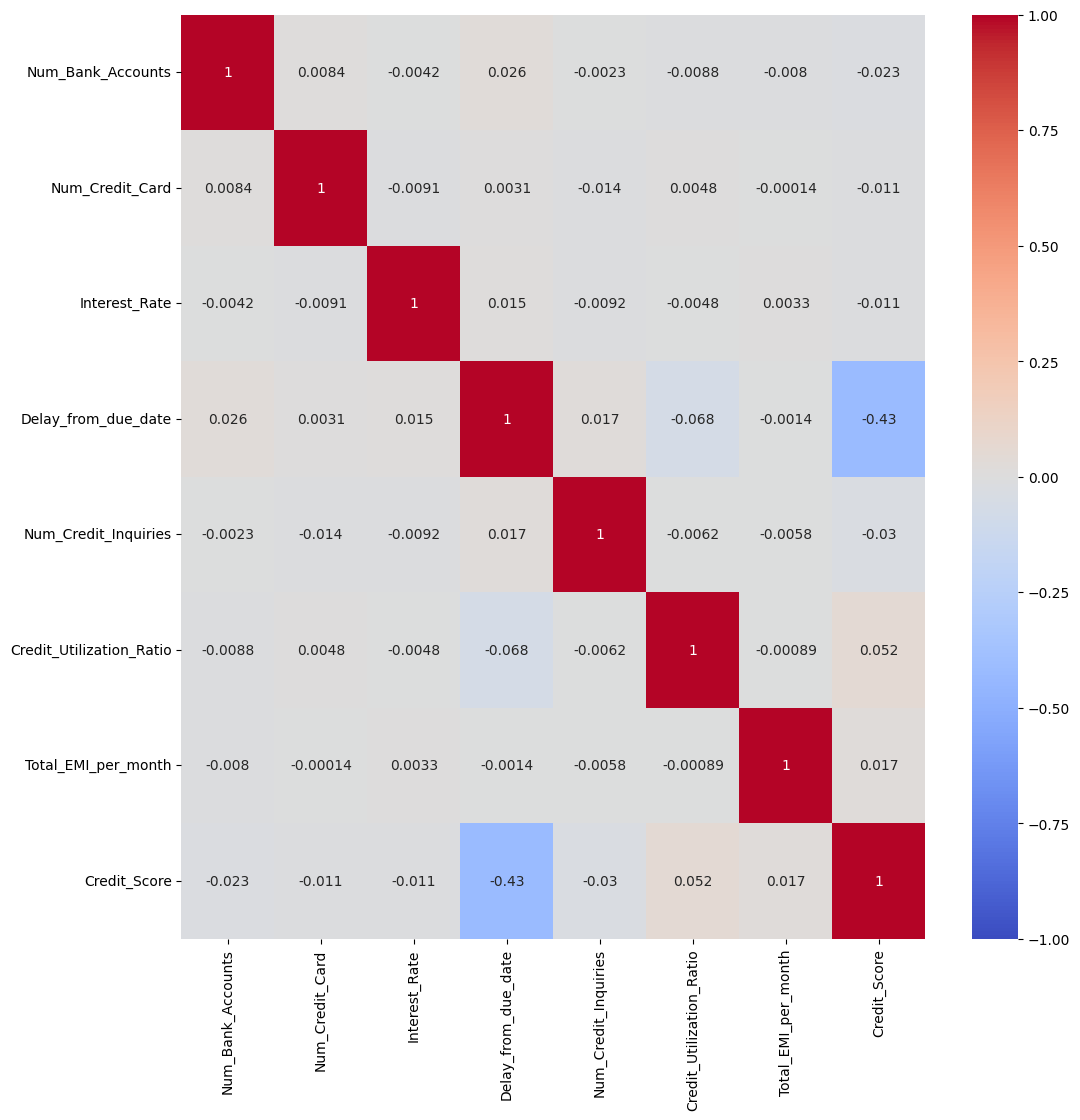

In [31]:
plt.figure(figsize=(12,12))
# vmin, vmax? -> 히트맵에 표시할 최소, 최대 숫자를 지정해주는 파라미터를 의미
sns.heatmap(train.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)

In [32]:
# train 데이터의 칼럼들 중에서 데이터 타입이 object인 칼럼들을 for문으로 돌면서 출력하는 코드
for i in train.columns:
    if train[i].dtypes == 'O':
        print(i)

Age
Occupation
Annual_Income
Num_of_Loan
Num_of_Delayed_Payment
Outstanding_Debt
Credit_History_Age
Payment_of_Min_Amount
Amount_invested_monthly
Payment_Behaviour


In [33]:
# 데이터 내에서 '_'와 같이 특이한 값들을 대체하는 코드
for i in ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
          'Outstanding_Debt', 'Amount_invested_monthly']:
          train[i] = pd.to_numeric(train[i].str.replace('_',''))

In [34]:
train['Credit_History_Age'] = train['Credit_History_Age'].str.replace(' Months','')

In [35]:
train['Credit_History_Age']

0        22 Years and 1
1                   NaN
2        22 Years and 3
3        22 Years and 4
4        22 Years and 5
              ...      
13519    11 Years and 9
13520    27 Years and 4
13521    27 Years and 5
13522    27 Years and 6
13523               NaN
Name: Credit_History_Age, Length: 13524, dtype: object

In [36]:
# Years and를 기준삼아 split해서 Years, Month를 0열, 1열로 만들고
# pd.to_numeric()으로 숫자로 변환해서 Years * 12 + Months로 만드는 코드
train['Credit_History_Age'] = pd.to_numeric(train['Credit_History_Age'].str.split(' Years and ', expand=True)[0]) * 12 + pd.to_numeric(train['Credit_History_Age'].str.split(' Years and ', expand=True)[1])

In [37]:
train.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Credit_Score
count,13523.000000,1.352300e+04,13523.000000,13523.000000,13523.000000,13523.000000,13523.000000,12565.000000,13240.000000,13523.000000,13523.000000,12267.000000,13523.000000,12951.000000,13523.000000
mean,117.064557,1.813154e+05,17.776751,23.724248,73.291577,2.975745,21.105894,28.530680,25.550227,1410.530391,32.287814,224.222222,1417.478232,641.147036,0.881979
std,712.193709,1.452888e+06,122.008497,134.639479,465.977347,59.325680,14.541289,206.070879,181.761323,1171.709384,5.151048,98.041859,8272.233614,2037.921302,0.678861
min,-500.000000,7.006520e+03,0.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,0.000000,1.480000,20.172942,1.000000,0.000000,0.000000,0.000000
25%,24.000000,2.005192e+04,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,3.000000,527.160000,27.978240,152.000000,30.015558,76.347726,0.000000
50%,33.000000,4.019896e+04,6.000000,5.000000,14.000000,3.000000,18.000000,14.000000,5.000000,1145.900000,32.313498,222.000000,69.602920,139.978562,1.000000
75%,42.000000,7.565004e+04,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,9.000000,1898.340000,36.505636,305.000000,171.077024,279.303493,1.000000
max,8674.000000,2.418881e+07,1789.000000,1486.000000,5747.000000,1485.000000,67.000000,4241.000000,2592.000000,4998.070000,50.000000,404.000000,82204.000000,10000.000000,2.000000


In [38]:
#Age -> Age가 0 초과인 데이터만 추출
# 목표 변경 -> 0살 초과 ~ 100살 까지의 있는 데이터들만 추출
# sns.barplot에서 8000, 6000등이 초과해서 뭔가 찜찜하고 이상하다는 느낌?

train = train[(train['Age'] > 0) & (train['Age'] < 100)]

In [39]:
train.tail()
# 이제 정제되어진 데이터들을 age를 기준으로 오름차순으로 정렬하는 코드
train['Age'].sort_values(ascending=True)

8848     14.0
12192    14.0
10257    14.0
10258    14.0
10259    14.0
         ... 
6124     56.0
6125     56.0
6126     56.0
7106     56.0
3550     56.0
Name: Age, Length: 13126, dtype: float64

<Axes: ylabel='Age'>

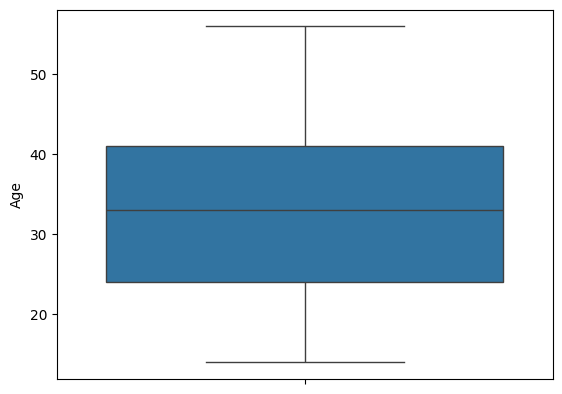

In [40]:
sns.boxplot(y=train['Age'])

In [41]:
# 신용카드가 10개 이상인 사람들의 데이터들을 이상치로
train = train[train['Num_Credit_Card'] <= 10]

In [42]:
# 신용점수를 y로 잡았으니 이자율도 고려
train = train[train['Interest_Rate'] <= 40]

In [43]:
# 대출 건수가 0건 이상 10건 이하인 데이터들만 가져오는 코드
train = train[(train['Num_of_Loan'] <= 10) & (train['Num_of_Loan'] >= 0)]

In [44]:
train

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score
0,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,4.0,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,2.0
1,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,-1.0,NaN,4.0,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,2.0
3,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,4.0,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,2.0
4,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,6.0,NaN,4.0,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,2.0
5,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,8.0,4.0,4.0,809.98,27.262259,270.0,No,49.574949,62.430172,!@9#%8,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13518,26.0,Musician,29441.78,8.0,6.0,23.0,7.0,59.0,18.0,10.0,3727.23,23.512239,140.0,Yes,111.416952,75.543712,Low_spent_Small_value_payments,0.0
13519,26.0,Musician,29441.78,8.0,6.0,23.0,7.0,59.0,18.0,10.0,3727.23,39.564192,141.0,Yes,111.416952,35.854058,High_spent_Large_value_payments,0.0
13520,46.0,Mechanic,35263.44,6.0,5.0,5.0,0.0,9.0,14.0,3.0,410.00,35.657475,328.0,No,0.000000,87.391146,Low_spent_Large_value_payments,1.0
13521,46.0,Mechanic,35263.44,6.0,5.0,5.0,0.0,11.0,14.0,3.0,410.00,29.081644,329.0,No,0.000000,232.338501,Low_spent_Small_value_payments,1.0


In [45]:
# 연체된 결제 수가 0이상 30건 이하인 데이터들 추출하는 코드
train = train[(train['Num_of_Delayed_Payment'] <=30) & (train['Num_of_Delayed_Payment'] >= 0)]

In [46]:
train

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score
0,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,4.0,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,2.0
3,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,4.0,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,2.0
5,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,8.0,4.0,4.0,809.98,27.262259,270.0,No,49.574949,62.430172,!@9#%8,2.0
6,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,3.0,8.0,4.0,809.98,22.537593,271.0,No,49.574949,178.344067,Low_spent_Small_value_payments,2.0
7,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,3.0,6.0,4.0,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13518,26.0,Musician,29441.78,8.0,6.0,23.0,7.0,59.0,18.0,10.0,3727.23,23.512239,140.0,Yes,111.416952,75.543712,Low_spent_Small_value_payments,0.0
13519,26.0,Musician,29441.78,8.0,6.0,23.0,7.0,59.0,18.0,10.0,3727.23,39.564192,141.0,Yes,111.416952,35.854058,High_spent_Large_value_payments,0.0
13520,46.0,Mechanic,35263.44,6.0,5.0,5.0,0.0,9.0,14.0,3.0,410.00,35.657475,328.0,No,0.000000,87.391146,Low_spent_Large_value_payments,1.0
13521,46.0,Mechanic,35263.44,6.0,5.0,5.0,0.0,11.0,14.0,3.0,410.00,29.081644,329.0,No,0.000000,232.338501,Low_spent_Small_value_payments,1.0


In [48]:
# 위에서 했던 데이터들 정제 & 전처리까지 진행을 완료한 후 각 칼럼의 na값의 개수를 추출하는 코드
train.isna().sum()

Age                            0
Occupation                     0
Annual_Income                  0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Num_Credit_Inquiries         232
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          1043
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly      456
Payment_Behaviour              0
Credit_Score                   0
dtype: int64

In [49]:
# 신용조회수 일부 데이터들에서 na값이 있어서 그 na값들을 0으로 채우는 코드
train['Num_Credit_Inquiries'] = train['Num_Credit_Inquiries'].fillna(0)

<ipython-input-49-3d65b07b99e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Num_Credit_Inquiries'] = train['Num_Credit_Inquiries'].fillna(0)


In [51]:
train

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score
0,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,4.0,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,2.0
3,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,4.0,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,2.0
5,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,8.0,4.0,4.0,809.98,27.262259,270.0,No,49.574949,62.430172,!@9#%8,2.0
6,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,3.0,8.0,4.0,809.98,22.537593,271.0,No,49.574949,178.344067,Low_spent_Small_value_payments,2.0
7,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,3.0,6.0,4.0,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13518,26.0,Musician,29441.78,8.0,6.0,23.0,7.0,59.0,18.0,10.0,3727.23,23.512239,140.0,Yes,111.416952,75.543712,Low_spent_Small_value_payments,0.0
13519,26.0,Musician,29441.78,8.0,6.0,23.0,7.0,59.0,18.0,10.0,3727.23,39.564192,141.0,Yes,111.416952,35.854058,High_spent_Large_value_payments,0.0
13520,46.0,Mechanic,35263.44,6.0,5.0,5.0,0.0,9.0,14.0,3.0,410.00,35.657475,328.0,No,0.000000,87.391146,Low_spent_Large_value_payments,1.0
13521,46.0,Mechanic,35263.44,6.0,5.0,5.0,0.0,11.0,14.0,3.0,410.00,29.081644,329.0,No,0.000000,232.338501,Low_spent_Small_value_payments,1.0


In [53]:
# 이 방법까지 시도해서 다시 한번 확인
# Credit_History_Age, Amount_invested_montly에 아직 na값이 존재한 것을 확인
train.isna().sum()

Age                            0
Occupation                     0
Annual_Income                  0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Num_Credit_Inquiries           0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          1043
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly      456
Payment_Behaviour              0
Credit_Score                   0
dtype: int64

In [55]:
# 같은 의미이지만 혹시 몰라서 한번 시도해본 코드
train.isnull().sum()

Age                            0
Occupation                     0
Annual_Income                  0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Num_Credit_Inquiries           0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          1043
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly      456
Payment_Behaviour              0
Credit_Score                   0
dtype: int64

In [ ]:
train.isna().sum()

Age                            0
Occupation                     0
Annual_Income                  0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Num_Credit_Inquiries           0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          7541
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     3729
Payment_Behaviour              0
Credit_Score                   0
dtype: int64

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11012 entries, 0 to 13522
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       11012 non-null  float64
 1   Occupation                11012 non-null  object 
 2   Annual_Income             11012 non-null  float64
 3   Num_Bank_Accounts         11012 non-null  float64
 4   Num_Credit_Card           11012 non-null  float64
 5   Interest_Rate             11012 non-null  float64
 6   Num_of_Loan               11012 non-null  float64
 7   Delay_from_due_date       11012 non-null  float64
 8   Num_of_Delayed_Payment    11012 non-null  float64
 9   Num_Credit_Inquiries      11012 non-null  float64
 10  Outstanding_Debt          11012 non-null  float64
 11  Credit_Utilization_Ratio  11012 non-null  float64
 12  Credit_History_Age        9969 non-null   float64
 13  Payment_of_Min_Amount     11012 non-null  object 
 14  Total_

In [57]:
# na값이 있는 데이터들을 mean으로 채우는 코드
train = train.fillna(train.mean())

<ipython-input-57-e49e851f43b0>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.fillna(train.mean())


In [59]:
# 이제 na값이 없지 않다는 것을 확인
train.isna().sum()

Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Num_Credit_Inquiries        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Credit_Score                0
dtype: int64

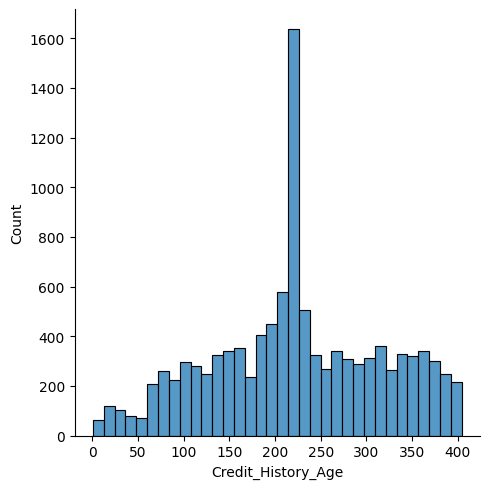

In [60]:
# 어제 시도했을 때와 credit_history_age의 데이터분포의 차이가 있다.
sns.displot(train['Credit_History_Age'])

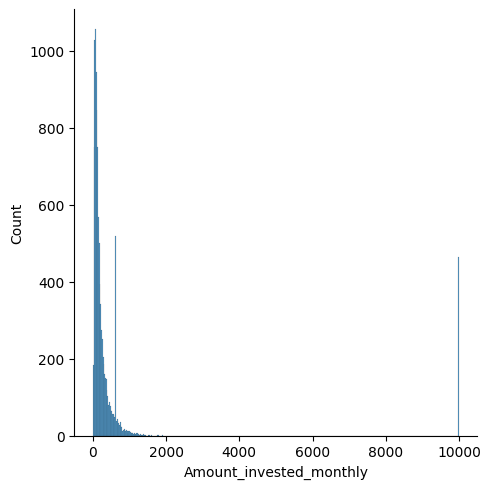

In [61]:
sns.displot(train['Amount_invested_monthly'])

In [63]:
#lightgbm 라이브러리 코드
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [64]:
basic_model = LGBMClassifier(random_state=10)

In [65]:
basic_model

LGBMClassifier(random_state=10)

In [71]:
# 거의 다 한거 같은데
# train.info()
train['Occupation'].value_counts()
# ______가 있어서 이것을 대체하면 좋을 거 같은데 'unknown'으로 대체
train['Occupation'] = train['Occupation'].replace('_______', 'Unknown')
train['Occupation'].value_counts()

Mechanic         742
Entrepreneur     740
Media_Manager    733
Unknown          732
Journalist       723
Lawyer           719
Doctor           717
Writer           714
Musician         698
Teacher          682
Architect        663
Manager          644
Engineer         641
Developer        638
Accountant       617
Scientist        609
Name: Occupation, dtype: int64

In [72]:
train['Payment_of_Min_Amount'].value_counts()

Yes    5808
No     3887
NM     1317
Name: Payment_of_Min_Amount, dtype: int64

In [73]:
train['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      2771
High_spent_Medium_value_payments    1989
Low_spent_Medium_value_payments     1532
High_spent_Large_value_payments     1520
High_spent_Small_value_payments     1229
Low_spent_Large_value_payments      1150
!@9#%8                               821
Name: Payment_Behaviour, dtype: int64

In [74]:
train['Payment_Behaviour'] = train['Payment_Behaviour'].replace('!@9#%8','Unknown')
train['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      2771
High_spent_Medium_value_payments    1989
Low_spent_Medium_value_payments     1532
High_spent_Large_value_payments     1520
High_spent_Small_value_payments     1229
Low_spent_Large_value_payments      1150
Unknown                              821
Name: Payment_Behaviour, dtype: int64

In [75]:
# 2개의 칼럼에서 일부 추가 정제를 하고 나서 이제 object형을 어떻게 처리하면 좋을까?
# one-hot-encoding을 사용하면 좋을 거 같다.
train = pd.get_dummies(train, columns=['Occupation', 'Payment_of_Min_Amount', 'Payment_Behaviour'])
train

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,...,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_Behaviour_Unknown
0,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,4.0,809.98,...,0,1,0,0,0,1,0,0,0,0
3,23.0,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,4.0,809.98,...,0,1,0,0,0,0,0,0,1,0
5,23.0,19114.12,3.0,4.0,3.0,4.0,8.0,4.0,4.0,809.98,...,0,1,0,0,0,0,0,0,0,1
6,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,8.0,4.0,809.98,...,0,1,0,0,0,0,0,0,1,0
7,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,6.0,4.0,809.98,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13518,26.0,29441.78,8.0,6.0,23.0,7.0,59.0,18.0,10.0,3727.23,...,0,0,1,0,0,0,0,0,1,0
13519,26.0,29441.78,8.0,6.0,23.0,7.0,59.0,18.0,10.0,3727.23,...,0,0,1,1,0,0,0,0,0,0
13520,46.0,35263.44,6.0,5.0,5.0,0.0,9.0,14.0,3.0,410.00,...,0,1,0,0,0,0,1,0,0,0
13521,46.0,35263.44,6.0,5.0,5.0,0.0,11.0,14.0,3.0,410.00,...,0,1,0,0,0,0,0,0,1,0


In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11012 entries, 0 to 13522
Data columns (total 41 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 11012 non-null  float64
 1   Annual_Income                                       11012 non-null  float64
 2   Num_Bank_Accounts                                   11012 non-null  float64
 3   Num_Credit_Card                                     11012 non-null  float64
 4   Interest_Rate                                       11012 non-null  float64
 5   Num_of_Loan                                         11012 non-null  float64
 6   Delay_from_due_date                                 11012 non-null  float64
 7   Num_of_Delayed_Payment                              11012 non-null  float64
 8   Num_Credit_Inquiries                                11012 non-null  float64


In [77]:
#어느 정도 전처리와 시각화까지 끝냈으면 lightgbm으로 가자!
# 그전에 모델링 먼저!
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop('Credit_Score', axis=1),
                                                    train['Credit_Score'], test_size=0.2, random_state=10)

In [78]:
#lightgbm 라이브러리 코드
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [79]:
# basic_model.fit(X_train, y_train)
modeling = LGBMClassifier(random_state=100)

In [80]:
modeling

LGBMClassifier(random_state=100)

In [81]:
modeling.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1884
[LightGBM] [Info] Number of data points in the train set: 8809, number of used features: 40
[LightGBM] [Info] Start training from score -1.209551
[LightGBM] [Info] Start training from score -0.641060
[LightGBM] [Info] Start training from score -1.743342


LGBMClassifier(random_state=100)

In [82]:
prediction_model = modeling.predict(X_test)

In [83]:
prediction_model

array([0., 1., 2., ..., 0., 1., 2.])

In [84]:
accuracy_score(y_test, prediction_model)

0.7812074443940081

In [85]:
confusion_matrix(y_test, prediction_model)

array([[521, 130,   9],
       [144, 940,  76],
       [  3, 120, 260]])

In [91]:
print(classification_report(y_test, prediction_model))

              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78       660
         1.0       0.79      0.81      0.80      1160
         2.0       0.75      0.68      0.71       383

    accuracy                           0.78      2203
   macro avg       0.77      0.76      0.77      2203
weighted avg       0.78      0.78      0.78      2203



In [88]:
prob = modeling.predict_proba(X_test)

In [89]:
prob

array([[0.8188642 , 0.12118818, 0.05994761],
       [0.04431136, 0.48862475, 0.46706389],
       [0.01717832, 0.40474782, 0.57807386],
       ...,
       [0.78870401, 0.21004164, 0.00125436],
       [0.07016055, 0.91800938, 0.01183008],
       [0.02345152, 0.25429579, 0.72225268]])

In [90]:
roc_auc_score(y_test, prob, multi_class='ovr')

0.90722775727528